In [1]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

In [2]:
model = YOLO("E:/Repos/IPCV2024_25/HomeAssignment/Bread_Recognition/BreadRecognition.pt")


0: 384x640 3 baguettes, 1 maltese-bread, 1 packaged-loaf, 14.1ms
Speed: 1.6ms preprocess, 14.1ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


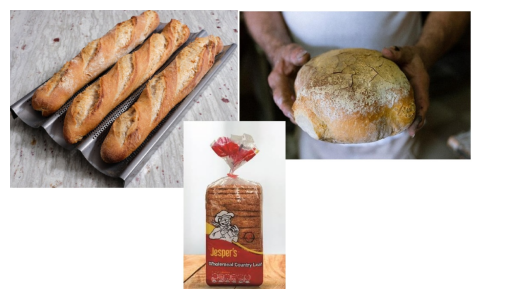

In [9]:
# All Bread Types Test

image_path = "img/Bread.jpg"  # Replace with your image path
image = cv2.imread(image_path)

model = YOLO("E:/Repos/IPCV2024_25/HomeAssignment/Bread_Recognition/BreadRecognition.pt")

results = model(image)
results[0].show()

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image_rgb)
plt.axis("off")
plt.show()

In [10]:
# Hand detection (Video Capture)

import mediapipe as mp

mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils

cap = cv2.VideoCapture(0)

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    hands = mp_hands.Hands(min_detection_confidence=0.3, min_tracking_confidence=0.3)
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    results = hands.process(frame_rgb)

    if results.multi_hand_landmarks:
        for hand_landmarks in results.multi_hand_landmarks:
            mp_drawing.draw_landmarks(frame, hand_landmarks, mp_hands.HAND_CONNECTIONS)

    cv2.imshow("Hand", frame)

    if cv2.waitKey(1) & 0xFF == ord("q"):
        break

cap.release()
cv2.destroyAllWindows()

In [11]:
# Hand + Bread detection (Video Capture)

import mediapipe as mp

model = YOLO("E:/Repos/IPCV2024_25/HomeAssignment/Bread_Recognition/BreadRecognition.pt")

hands = mp_hands.Hands(min_detection_confidence=0.3, min_tracking_confidence=0.3)
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils

cap = cv2.VideoCapture(0)

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
        
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    results = hands.process(frame_rgb)

    hand_boxes = []

    if results.multi_hand_landmarks:
        for hand_landmarks in results.multi_hand_landmarks:
            # Store hand co-ordinates to check for overlapping later
            x_min = min([lm.x for lm in hand_landmarks.landmark])
            y_min = min([lm.y for lm in hand_landmarks.landmark])
            x_max = max([lm.x for lm in hand_landmarks.landmark])
            y_max = max([lm.y for lm in hand_landmarks.landmark])

            h, w, _ = frame.shape
            x_min, y_min = int(x_min * w), int(y_min * h)
            x_max, y_max = int(x_max * w), int(y_max * h)

            hand_boxes.append((x_min, y_min, x_max, y_max))

            mp_drawing.draw_landmarks(frame, hand_landmarks, mp_hands.HAND_CONNECTIONS)
            
    # Detect bread using YOLO
    bread_results = model(frame)

    for result in bread_results:
        for box in result.boxes:
            x1, y1, x2, y2 = map(int, box.xyxy[0])
            confidence = box.conf[0].item()

            # Draw bounding box for bread
            cv2.rectangle(frame, (x1, y1), (x2, y2), (255, 0, 0), 2)
            cv2.putText(frame, f"Bread {confidence:.2f}", (x1, y1 - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

            # Check if a hand is holding the bread (box overlap)
            for hx1, hy1, hx2, hy2 in hand_boxes:
                if (hx1 < x2 and hx2 > x1 and hy1 < y2 and hy2 > y1):  # Overlapping
                    cv2.putText(frame, "Holding Bread!", (x1, y1 - 30),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)

    # Show frame
    cv2.imshow("Hand", frame)

    if cv2.waitKey(1) & 0xFF == ord("q"):
        break

# Release resources
cap.release()
cv2.destroyAllWindows()


0: 480x640 (no detections), 13.5ms
Speed: 1.4ms preprocess, 13.5ms inference, 0.3ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 13.2ms
Speed: 0.8ms preprocess, 13.2ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 13.5ms
Speed: 0.8ms preprocess, 13.5ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 12.8ms
Speed: 0.8ms preprocess, 12.8ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 11.4ms
Speed: 1.2ms preprocess, 11.4ms inference, 0.4ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 11.8ms
Speed: 0.8ms preprocess, 11.8ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 11.6ms
Speed: 0.9ms preprocess, 11.6ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 11.3ms
Speed: 0.9ms preprocess, 11.3ms i

In [13]:
# Hand + Bread detection (Image)

import mediapipe as mp

bread_model = YOLO("E:/Repos/IPCV2024_25/HomeAssignment/Bread_Recognition/BreadRecognition.pt")
hand_model = mp.solutions.hands.Hands(min_detection_confidence=0.3, min_tracking_confidence=0.3)

mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils

# Load image
image_path = "img/baguette_bread/HoldingBread.jpg"
image = cv2.imread(image_path)

bread_results = bread_model(image)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
hand_results = hand_model.process(image_rgb)

bread_boxes = []
for result in bread_results:
    for box in result.boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        bread_boxes.append((x1, y1, x2, y2)) # Save bread co-ordinates

hand_boxes = []
if hand_results.multi_hand_landmarks:
    for hand_landmarks in hand_results.multi_hand_landmarks:
        h, w, _ = image.shape
        x_min, y_min = w, h
        x_max, y_max = 0, 0
        
        for lm in hand_landmarks.landmark:
            x, y = int(lm.x * w), int(lm.y * h)
            x_min, y_min = min(x_min, x), min(y_min, y)
            x_max, y_max = max(x_max, x), max(y_max, y)

        margin = 10  # Pixels to expand
        x_min, y_min = max(0, x_min - margin), max(0, y_min - margin)
        x_max, y_max = min(w, x_max + margin), min(h, y_max + margin)

        hand_boxes.append((x_min, y_min, x_max, y_max)) # Save hand co-ordinates
        mp_drawing.draw_landmarks(image, hand_landmarks, mp_hands.HAND_CONNECTIONS)

# Check for overlapping
for (bx1, by1, bx2, by2) in bread_boxes:
    for (hx1, hy1, hx2, hy2) in hand_boxes:
        if bx1 < hx2 and bx2 > hx1 and by1 < hy2 and by2 > hy1:
            print("Hand is holding the bread!")

# Displaying rectangles on detected bread
for (x1, y1, x2, y2) in bread_boxes:
    cv2.rectangle(image, (x1, y1), (x2, y2), (255, 0, 0), 2)

# Show the output image
cv2.imshow("Hand + Bread Detection", image)
cv2.waitKey(0)
cv2.destroyAllWindows()


0: 448x640 1 baguette, 12.7ms
Speed: 1.3ms preprocess, 12.7ms inference, 0.8ms postprocess per image at shape (1, 3, 448, 640)
Hand is holding the bread!
